# 泰坦尼克
----------

#  问题

根据乘客的信息，来预测乘客的存活情况。

# 解决问题思路

1. 进行初步的数据分析
2. 特征工程：特征的选择、特征的填充、特征的转化...
3. 建模，选择合适的机器学习模型
4. 预测、评估

# 数据分析

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


e:\python3.7.0\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 导入训练集和测试集数据
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## 特征预览

In [3]:
train_df.shape
train_df.head()
test_df.shape
test_df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(418, 11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


通过上图,可以知道训练集共有891个人信息，每个人有12种特征； 测试集比训练集少一个特征（即本次实验的最终目的——预测是否存活）,有的特征含有缺失值

可以看到训练集、测试集上以下特征以及部分值：

- PassengerId => 乘客ID
- Survived => 是否存活
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

**数值型特征**

从下面的程序可以获得特征类别的详细信息，数值类包括：`PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare`

发现：

- 训练集中有38.38%人存活
- Age特征在训练集和测试集上都有缺失

In [4]:
train_df.info()
train_df.describe()
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**类别型特征**

可以获得非数值型的特征—— 类别型特征，包括：`Name, Sex, Ticket, Cabin, Embarked`

发现

- Cabin 特征有大量缺失值
- 男性 male 有577人，占 577/891= 64.8%
- Ticket 船票信息本应该是唯一的，却含有大量重复
- Embarked 有少量缺失值

In [5]:
train_df.describe(include=['O'])
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Van Impe, Miss. Catharina",male,CA. 2343,G6,S
freq,1,577,7,4,644


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Pallas y Castello, Mr. Emilio",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# 特征工程

## 特征选择

探究哪些特征与`Survived`有关。

**PassengerId、Name、Ticket、Cabin**

- PassengerId是唯一性标识（类似于name）,显然与Survived无关

- Name与Survived相关性较小，可以删去

- Ticket 也和Survived相关性较小，且有很多重复值，也可以去除

- Cabin 含有大量的缺失值，可以删去


In [6]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# 保存测试集的PassengerId提交答案使用
test_id = test_df['PassengerId'].copy()
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

**Pclass**

In [7]:
train_df.info()
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


通过以上结果可以发现，1等舱近63%的乘客存活，2等舱近47.3%的存活，显然舱位等级和存活有重要的关联。

**Sex 和 Age**

,Sex,Survived
0,female,0.742038
1,male,0.188908


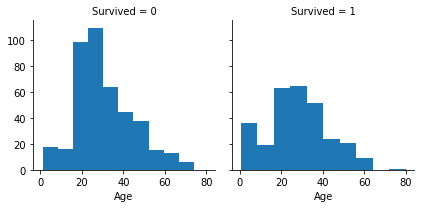

In [8]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age')

显示女性有74.2%存活，性别与Survived关系很大；小孩和老人存活的很多。

在电影中也可知，妇女、小孩、老人优先上救生船,性别和年龄都和Survived关联性很大。

**SibSp 和 Parch**

对于这两种特征，对于某些特定的值（SibSp=1 SibSp=2, Parch=1 Parch=2）生存率接近50%，说明与Survived相关性较小;其他的值相关性较大，可以考虑基于这两种特征生成新的特征。

In [9]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Fare**

将票价均分成5个价格段，发现票价越高，存活率越高；票价越低，存活率越低，说明票价与Survived相关性较高。

In [10]:
train_df['FareInterval'] = pd.qcut(train_df['Fare'], 5)
train_df[['FareInterval', 'Survived']].groupby(['FareInterval'], as_index=False).mean().sort_values(by='FareInterval', ascending=True)

,FareInterval,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


**Embarked**

S 和 Q 港口登船的人存活率较低， C港口登船的人存活率较高，Embarked 和 Survived 关联性较高。

In [11]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=True)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## 缺失值填充

需要进行数值填充的特征有：`Age` ， `Embarked`和 测试集中的 `Fare`。

**Age填充**

对于缺失Age信息的乘客，使用与该乘客同一Pclass，同一sex人群的中位数作为缺失Age信息的乘客Age值

In [12]:
# age * pclass  =  2 * 3
guess_ages = np.zeros((2,3))
# 构建所有乘客信息
all_data_df = train_df.append(test_df, sort=False)

sex_list = ['male', 'female']

for i in range(0, 2):
    for j in range(0, 3):
        # 注意Pclass从1开始
        guess_df = all_data_df[(all_data_df['Sex'] == sex_list[i]) & (all_data_df['Pclass'] == j+1)]['Age'].dropna()
        guess_ages[i,j] = guess_df.median()
        
for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Sex == sex_list[i]) & (train_df.Pclass == j+1), 'Age'] = guess_ages[i,j]
        test_df.loc[ (test_df.Age.isnull()) & (test_df.Sex == sex_list[i]) & (test_df.Pclass == j+1), 'Age'] = guess_ages[i,j]

train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

**Embarked填充**

使用众数填充，

In [13]:
embarked_mode = all_data_df['Embarked'].dropna().mode()[0]

train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)
test_df['Embarked'] = test_df['Embarked'].fillna(embarked_mode)

**测试集中Fare填充**

In [14]:
fare_mode = all_data_df['Fare'].dropna().mode()[0]
test_df['Fare'] = test_df['Fare'].fillna(fare_mode)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null int32
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 21.3+ KB


## 特征转换

### 类别型特征映射 ###

Sex 与 Embarked

In [15]:
train_df['Sex'] = train_df['Sex'].map({'male' : 0, 'female' : 1}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

train_df['Embarked'] = train_df['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareInterval
0,0,3,0,22,1,0,7.2500,2,"(-0.001, 7.854]"
1,1,1,1,38,1,0,71.2833,0,"(39.688, 512.329]"
2,1,3,1,26,0,0,7.9250,2,"(7.854, 10.5]"
3,1,1,1,35,1,0,53.1000,2,"(39.688, 512.329]"
4,0,3,0,35,0,0,8.0500,2,"(7.854, 10.5]"


### 数值型特征映射 ###

将连续性特征映射成离散型（区间段），包括 Age 和 Fare

In [16]:
train_df['AgeInterval'] = pd.cut(train_df['Age'], 5)
train_df[['AgeInterval', 'Survived']].groupby(['AgeInterval'], as_index=False).mean().sort_values(by='AgeInterval', ascending=True)

# FareInterval已经在上面求得
train_df[['FareInterval', 'Survived']].groupby(['FareInterval'], as_index=False).mean().sort_values(by='FareInterval', ascending=True)

,AgeInterval,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


,FareInterval,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [17]:
for df in [train_df, test_df]:
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4

    df.loc[ df['Fare'] <= 7.854, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.854) & (df['Fare'] <= 10.5), 'Fare'] = 1
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'Fare']   = 2
    df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'Fare']   = 3
    df.loc[ df['Fare'] > 39.688, 'Fare'] = 4
    df['Fare'] = df['Fare'].astype(int)

train_df = train_df.drop(['AgeInterval','FareInterval'], axis=1)

## 生成新特征

可以将`SibSp` 和 `Parch`相加，组成新的特征 —— `FamilySize`，既保留了原特征的特点，又减少了总特征的数目。

In [18]:
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [19]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)

train_df.head()
test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,1,0,2,2
1,1,1,1,2,4,0,2
2,1,3,1,1,1,2,1
3,1,1,1,2,4,2,2
4,0,3,0,2,1,2,1


,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,2,0,1,1
1,3,1,2,0,2,2
2,2,0,3,1,1,1
3,3,0,1,1,2,1
4,3,1,1,2,2,3


# 建模

这是一个典型的二分类问题，常用的模型有很多：

- 逻辑回归
- SVM
- 朴素贝叶斯分类器
- 决策树
- KNN
- 随机森林
- 神经网络
- ...


In [20]:
train_X = train_df.drop('Survived', axis=1)
train_Y = train_df['Survived']
test_X = test_df

In [21]:
# LogisticRegression
lr_clf = LogisticRegression()
# SVC
sv_clf = SVC()
# GaussianNB
gnb_clf = GaussianNB()
# KNeighborsClassifier
knn_clf = KNeighborsClassifier()
# RandomForestClassifier
rfc_clf = RandomForestClassifier()

# 训练
lr_clf.fit(train_X, train_Y)
sv_clf.fit(train_X, train_Y)
gnb_clf.fit(train_X, train_Y)
knn_clf.fit(train_X, train_Y)
rfc_clf.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

GaussianNB(priors=None, var_smoothing=1e-09)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# 评估

比较这五个模型的ACC, Random Forest 准确率达到了 **87 %**, 故选择 Random Forest 作为最终模型进行预测

In [22]:
acc_lr = lr_clf.score(train_X, train_Y)
acc_sv = sv_clf.score(train_X, train_Y)
acc_gnb = gnb_clf.score(train_X, train_Y)
acc_knn = knn_clf.score(train_X, train_Y)
acc_rfc = rfc_clf.score(train_X, train_Y)

acc_all = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'KNN', 'Random Forest'],
    'Score': [acc_lr, acc_sv, acc_gnb, acc_knn, acc_rfc]})

acc_all.sort_values(by='Score', ascending=False)


,Model,Score
4,Random Forest,0.873176
3,KNN,0.846240
1,Support Vector Machines,0.829405
0,Logistic Regression,0.805836
2,Naive Bayes,0.773288


# 预测

In [23]:
predict_survived = rfc_clf.predict(test_X)


In [24]:
submission = pd.DataFrame({
        "PassengerId": test_id,
        "Survived": predict_survived
    })
submission.to_csv('submission.csv', index=False)